In [91]:
from nengo import spa
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [69]:
nr_pointers_total = [10, 64, 512, 1024, 2048]
hits = np.zeros(len(runs)+1)
max_sim = 0.1

for i, n_pointers in enumerate(nr_pointers_total):
    d = n_pointers
    vectors = np.zeros((1, d), dtype=float)
    vectors[0] = spa.SemanticPointer(d).v
    for _ in range(1, n_pointers):
        sp = spa.SemanticPointer(d)
        pp_sim = max(np.dot(vectors, sp.v))
        if pp_sim > max_sim:
            hits[i] += 1
        else:
            vectors = np.vstack([vectors, sp.v])

In [70]:
print hits
hits/np.array(nr_pointers_total)

[   5.   53.  348.  250.    6.]


array([ 0.5       ,  0.828125  ,  0.6796875 ,  0.24414062,  0.00292969])

In [77]:
def generate_vectors(nr_vectors, max_similarity, dimensions):
    vectors = np.zeros((1, dimensions), dtype=float)
    vectors[0] = spa.SemanticPointer(dimensions).v
    hits = 0
    
    for _ in range(nr_vectors):
        sp = spa.SemanticPointer(dimensions)
        pp_sim = max(np.dot(vectors, sp.v))
        if pp_sim > max_similarity:
            hits += 1
        else:
            vectors = np.vstack([vectors, sp.v])
    return hits

In [102]:
max_similarities = [0.1, 0.15, 0.2]
nr_vectors = 2**np.arange(6,12)

hits = np.zeros((len(max_similarities), len(nr_vectors)))
for i, m_s in enumerate(max_similarities):
    for j, nr_vec in enumerate(nr_vectors):
        hits[i,j] = generate_vectors(nr_vec, m_s, nr_vec)

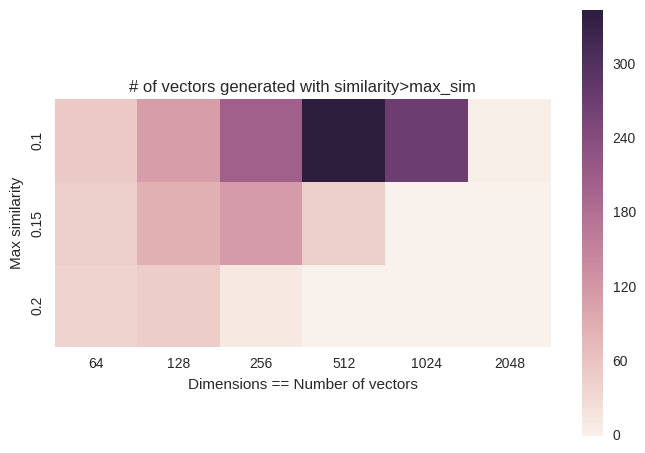

In [105]:
sns.heatmap(hits, square=True, xticklabels=[str(x) for x in nr_vectors], yticklabels=[str(x) for x in max_similarities])
plt.xlabel('Dimensions == Number of vectors')
plt.ylabel('Max similarity')
plt.title("# of vectors generated with similarity>max_sim")
plt.show()

In [96]:
sns.heatmap?